In [4]:
import numpy as np
import cv2

image = cv2.imread('./images/train/000024.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print(f"Image train shape: {height}x{width}")

image = cv2.imread('./images/val/005753.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print(f"Image val shape: {height}x{width}")

Image train shape: 401x640
Image val shape: 624x468


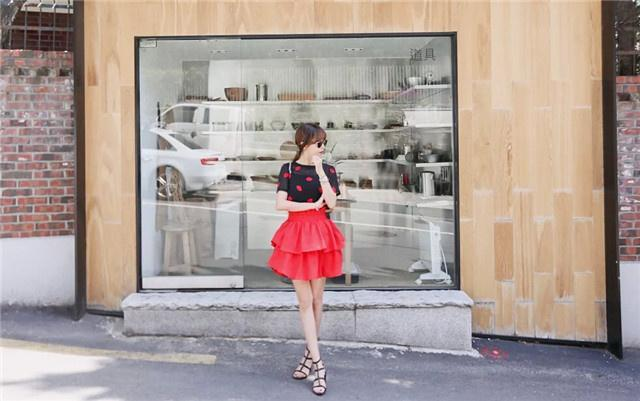

In [13]:
from IPython.display import Image
Image(filename='./images/train/000024.jpg', width=700)

In [14]:
%%writefile -a ./detection.yaml

train: ./images/train/
val: ./images/val/

nc: 13

names: ["t_shirt","long_sleeved_shirt","short_sleeved_outwear","long_sleeved_outwear","vest","sling","shorts","trousers","skirt","short_sleeved_dress","long_sleeved_dress","vest_dress","sling_dress"]

Writing ./detection.yaml


In [1]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

results = model.train(data='./detection.yaml', epochs=25, imgsz=640)  # train the model

Ultralytics 8.3.127 🚀 Python-3.13.3 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11882MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./detection.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

train: Scanning /home/kapa/Documents/Projects/Fashion-AI/labels/train.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
Exception ignored in: <function _afterFork at 0x71fc7bb0f4c0>
Traceback (most recent call last):
  File "/usr/lib/python3.13/logging/__init__.py", line 245, in _afterFork
    def _afterFork():
KeyboardInterrupt: 


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3795.6±1774.4 MB/s, size: 60.6 KB)


val: Scanning /home/kapa/Documents/Projects/Fashion-AI/labels/val.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/625 [00:05<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 2046219, 2046220, 2046221, 2046222, 2046224) exited unexpectedly

In [19]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.127 🚀 Python-3.13.3 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11882MiB)
Model summary (fused): 92 layers, 25,847,287 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3866.7±1492.4 MB/s, size: 46.5 KB)


val: Scanning /home/kapa/Documents/Projects/Fashion-AI/labels/val.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:13<00:00,  9.20it/s]


                   all       2000       3313      0.621      0.709       0.72      0.618
               t_shirt        796        806      0.825      0.902      0.934      0.822
    long_sleeved_shirt        345        347      0.695      0.763        0.8      0.683
 short_sleeved_outwear         13         13      0.439      0.308      0.356      0.345
  long_sleeved_outwear        111        111       0.53       0.82      0.769      0.658
                  vest        162        163      0.599      0.743      0.763       0.64
                 sling         31         32      0.542      0.406       0.47      0.349
                shorts        269        269      0.682      0.803       0.85      0.706
              trousers        605        610      0.833       0.92      0.944      0.773
                 skirt        419        419      0.756      0.819      0.863      0.739
   short_sleeved_dress        180        181      0.597      0.751      0.733      0.666
    long_sleeved_dres

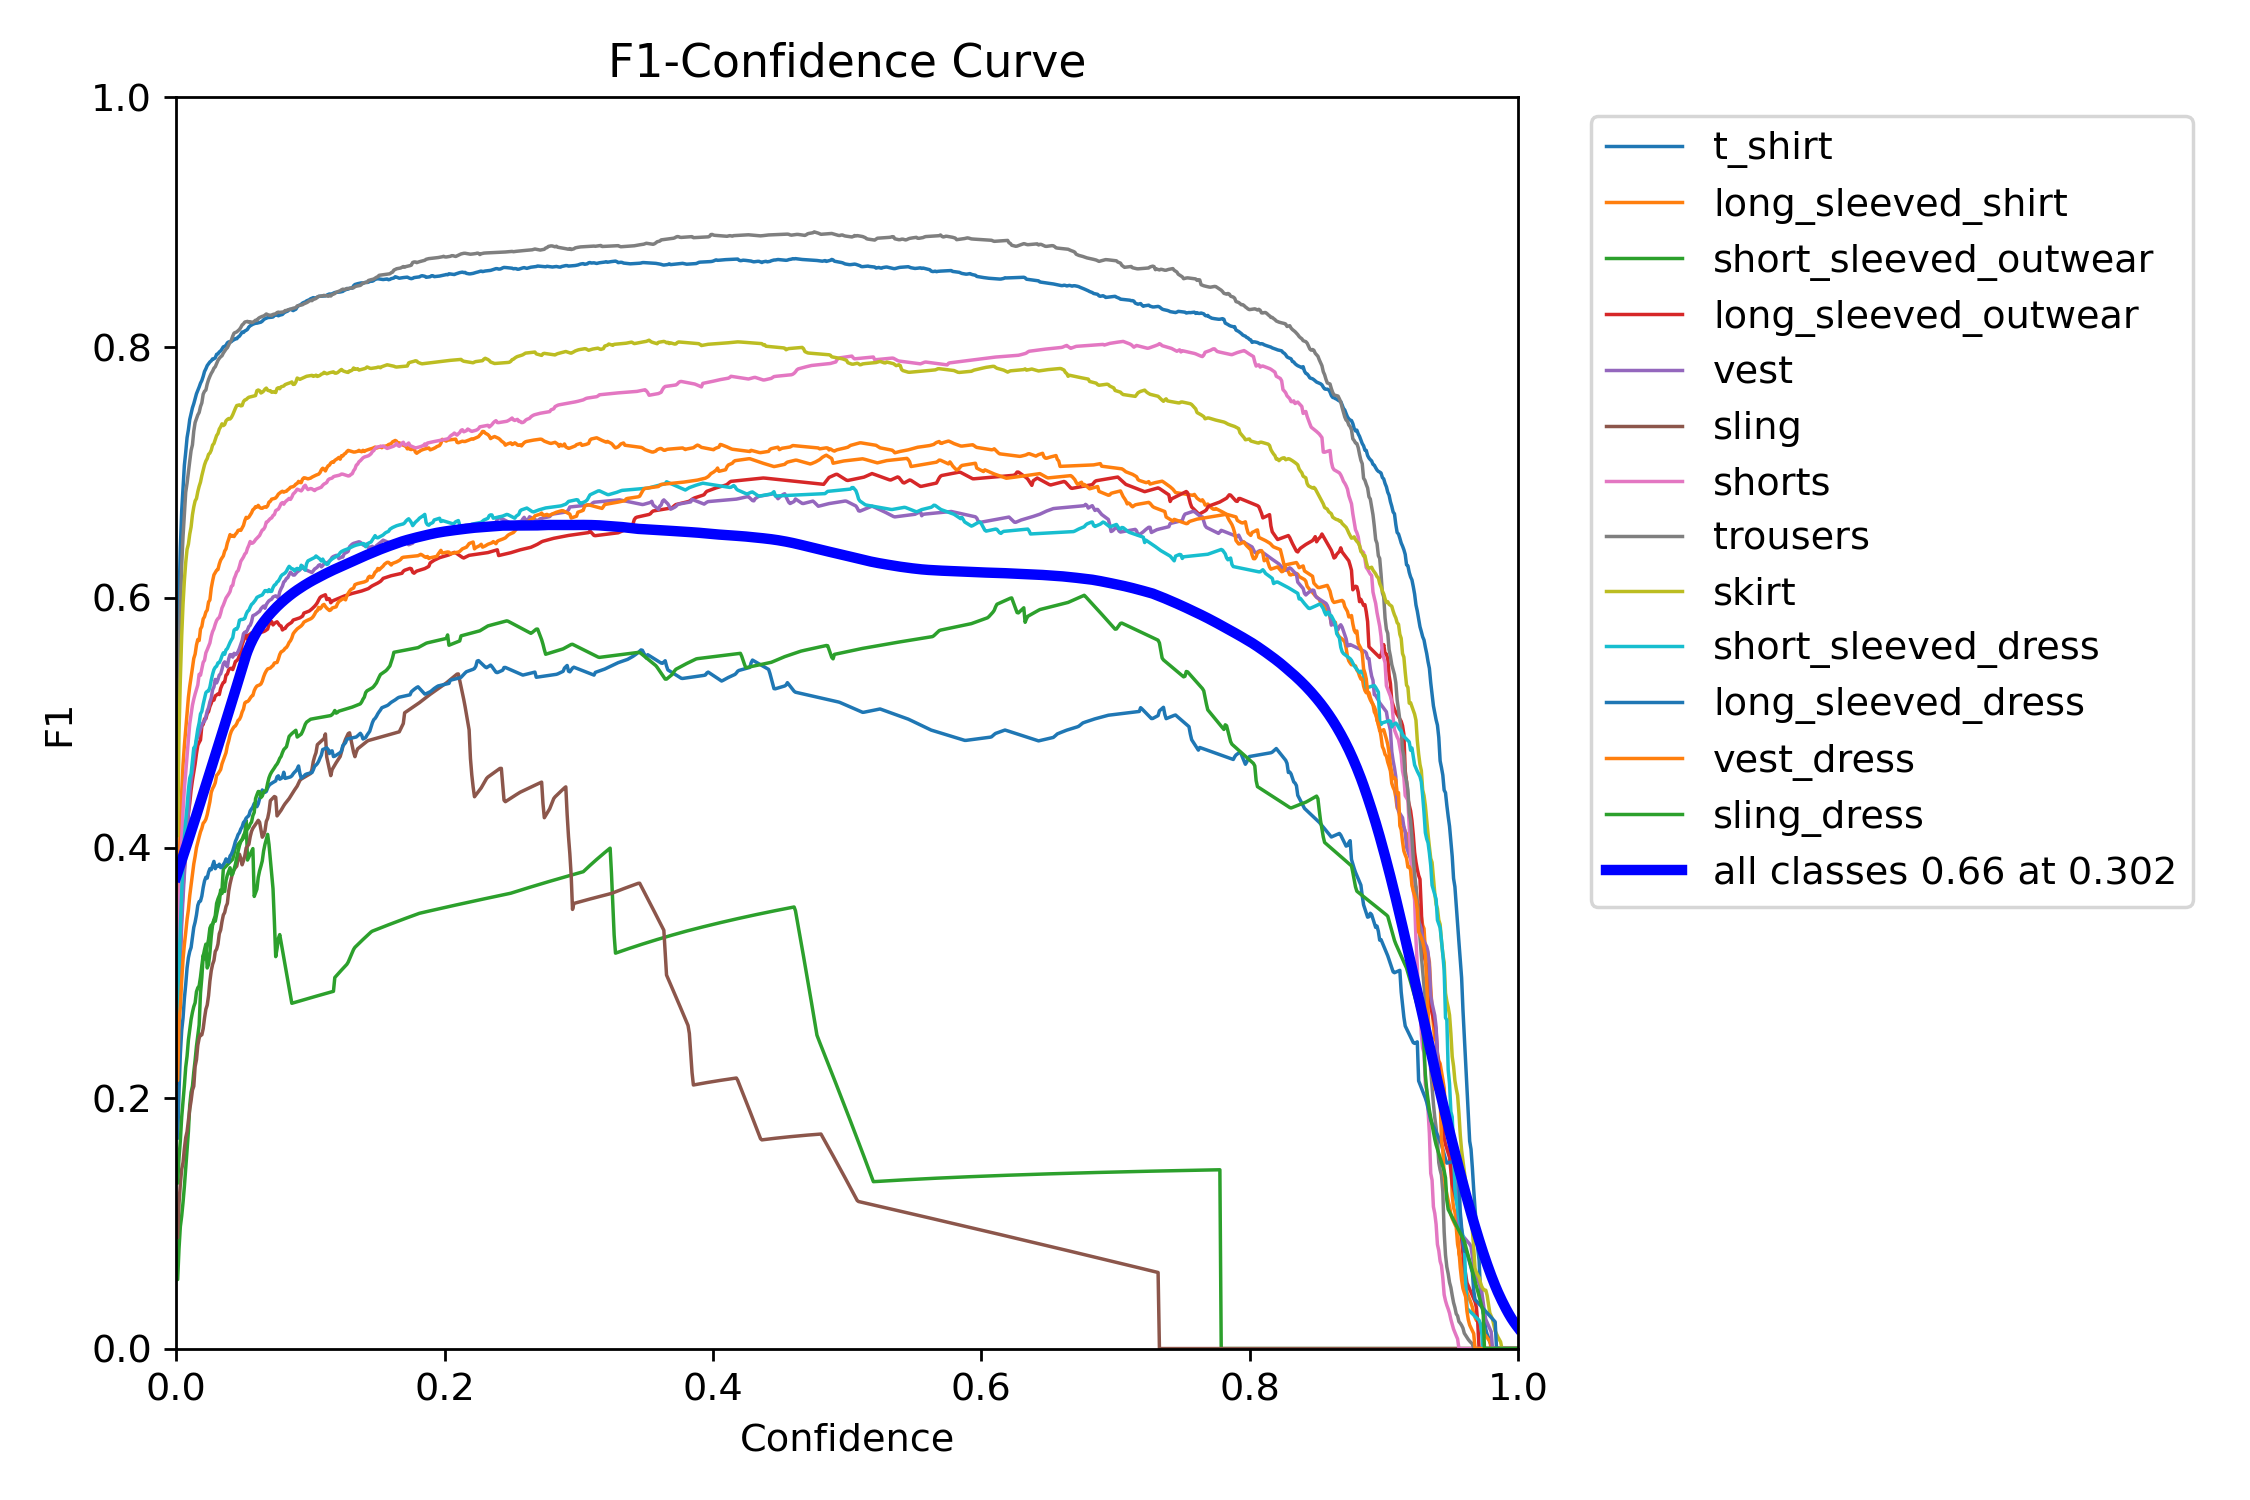

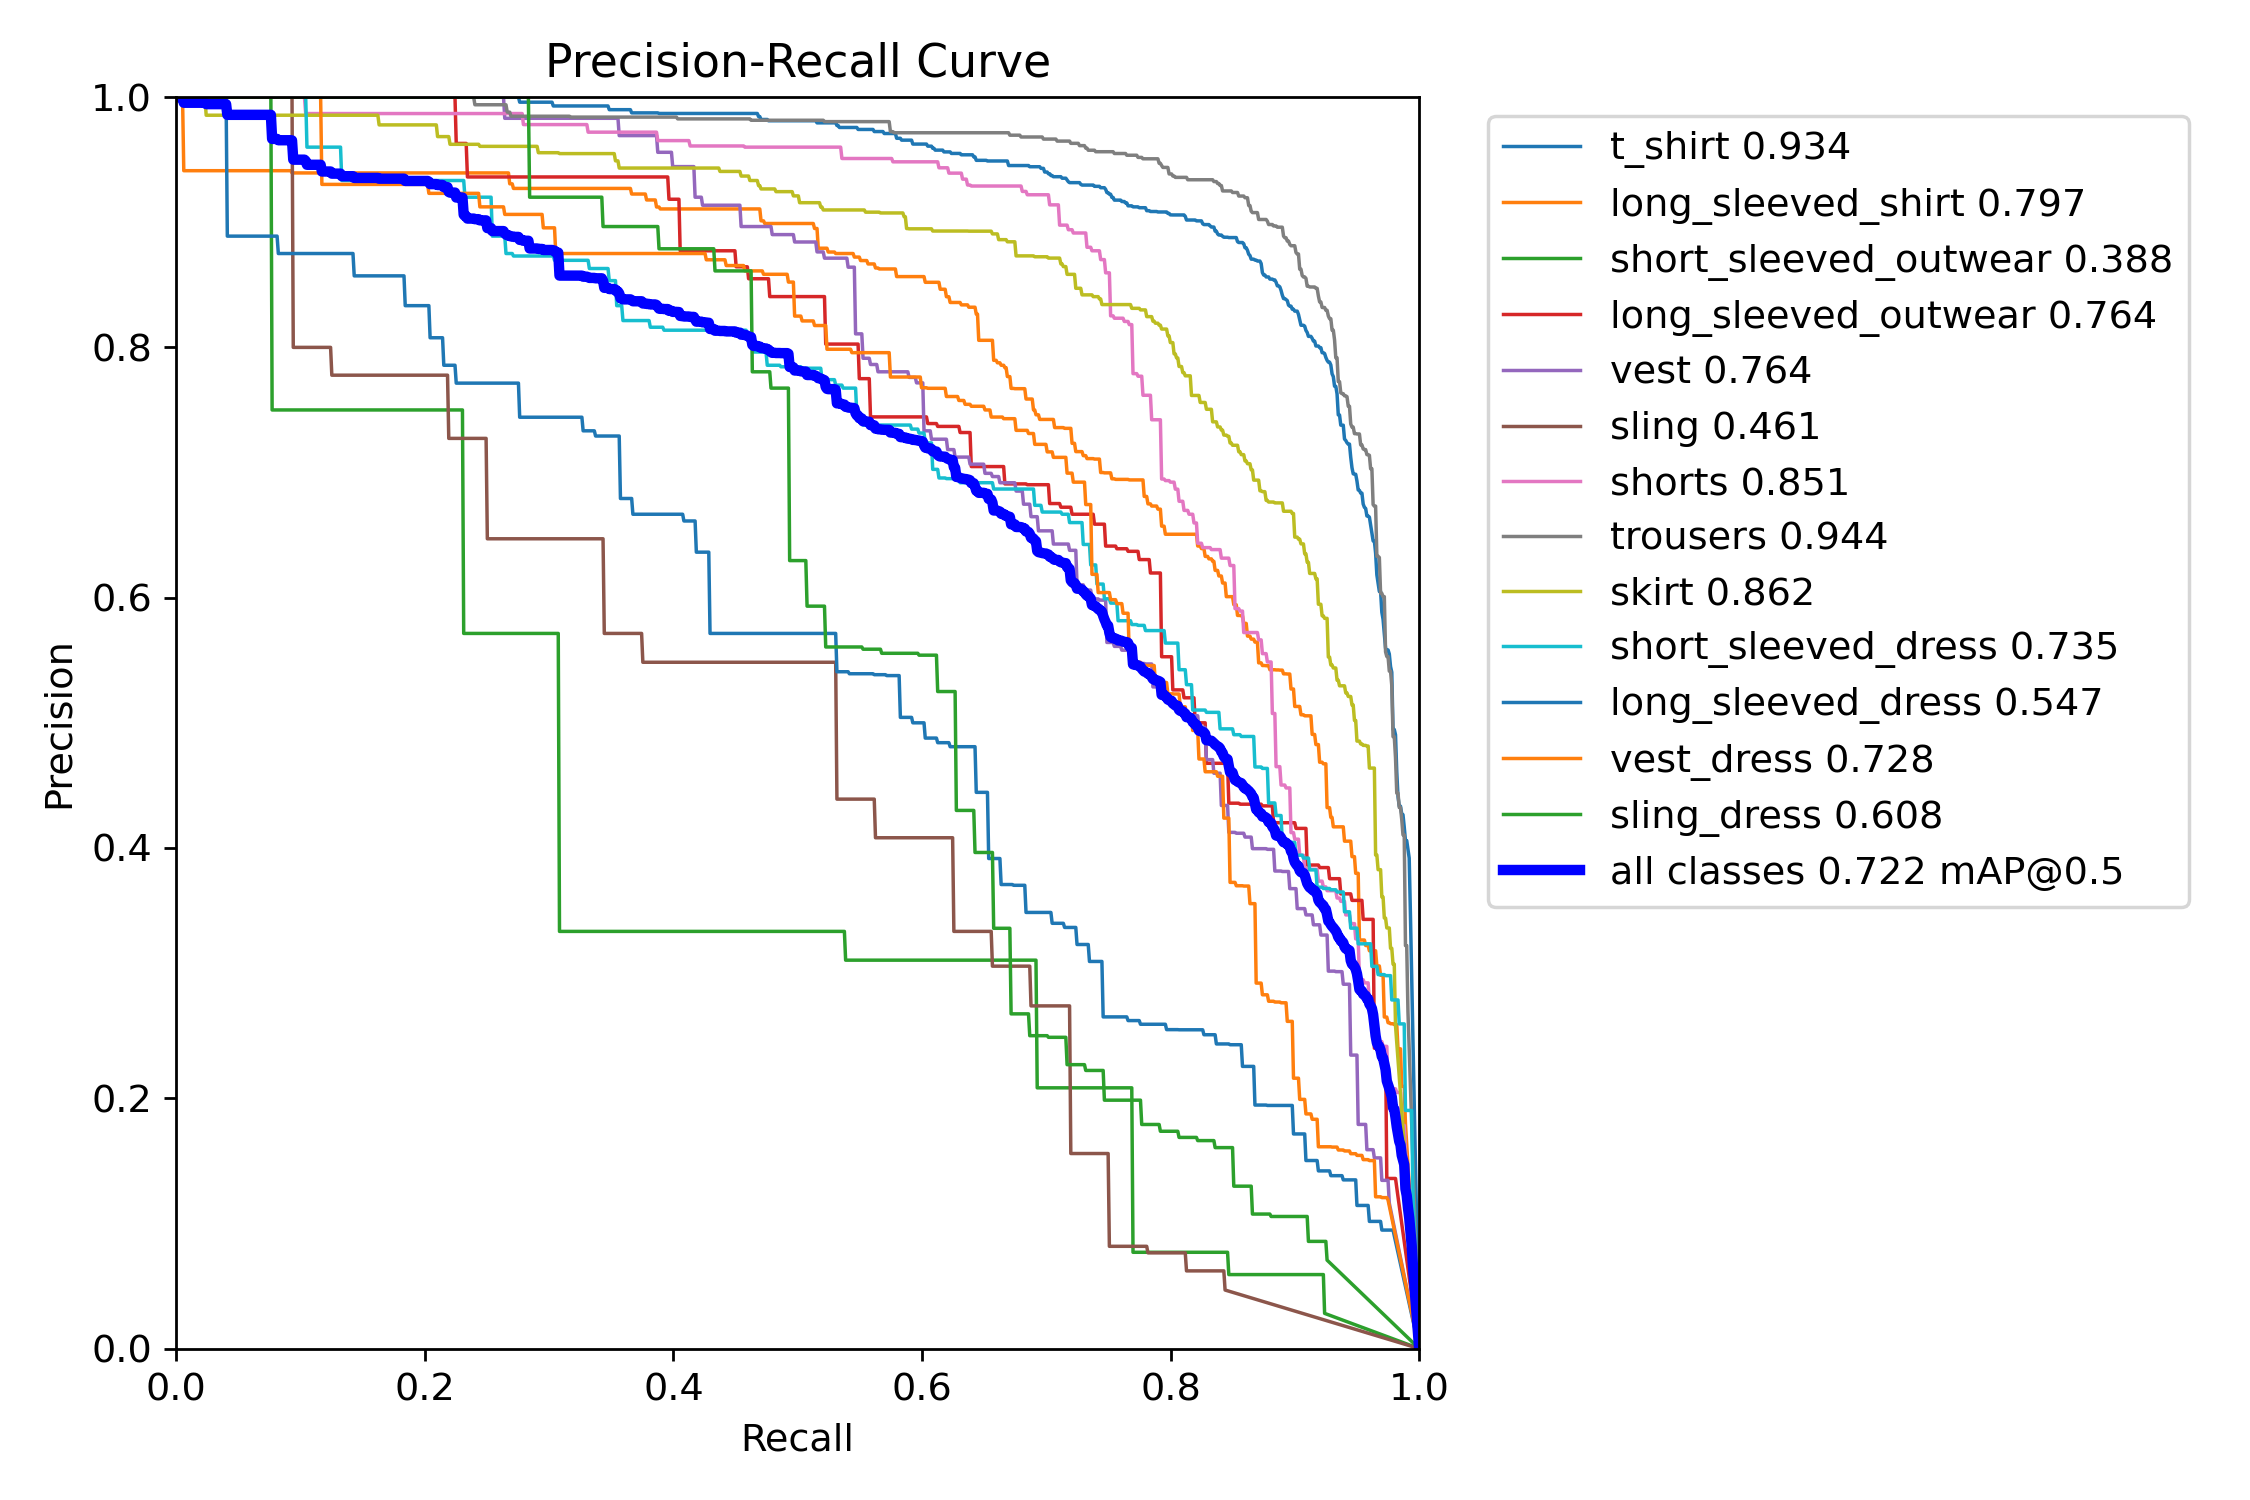

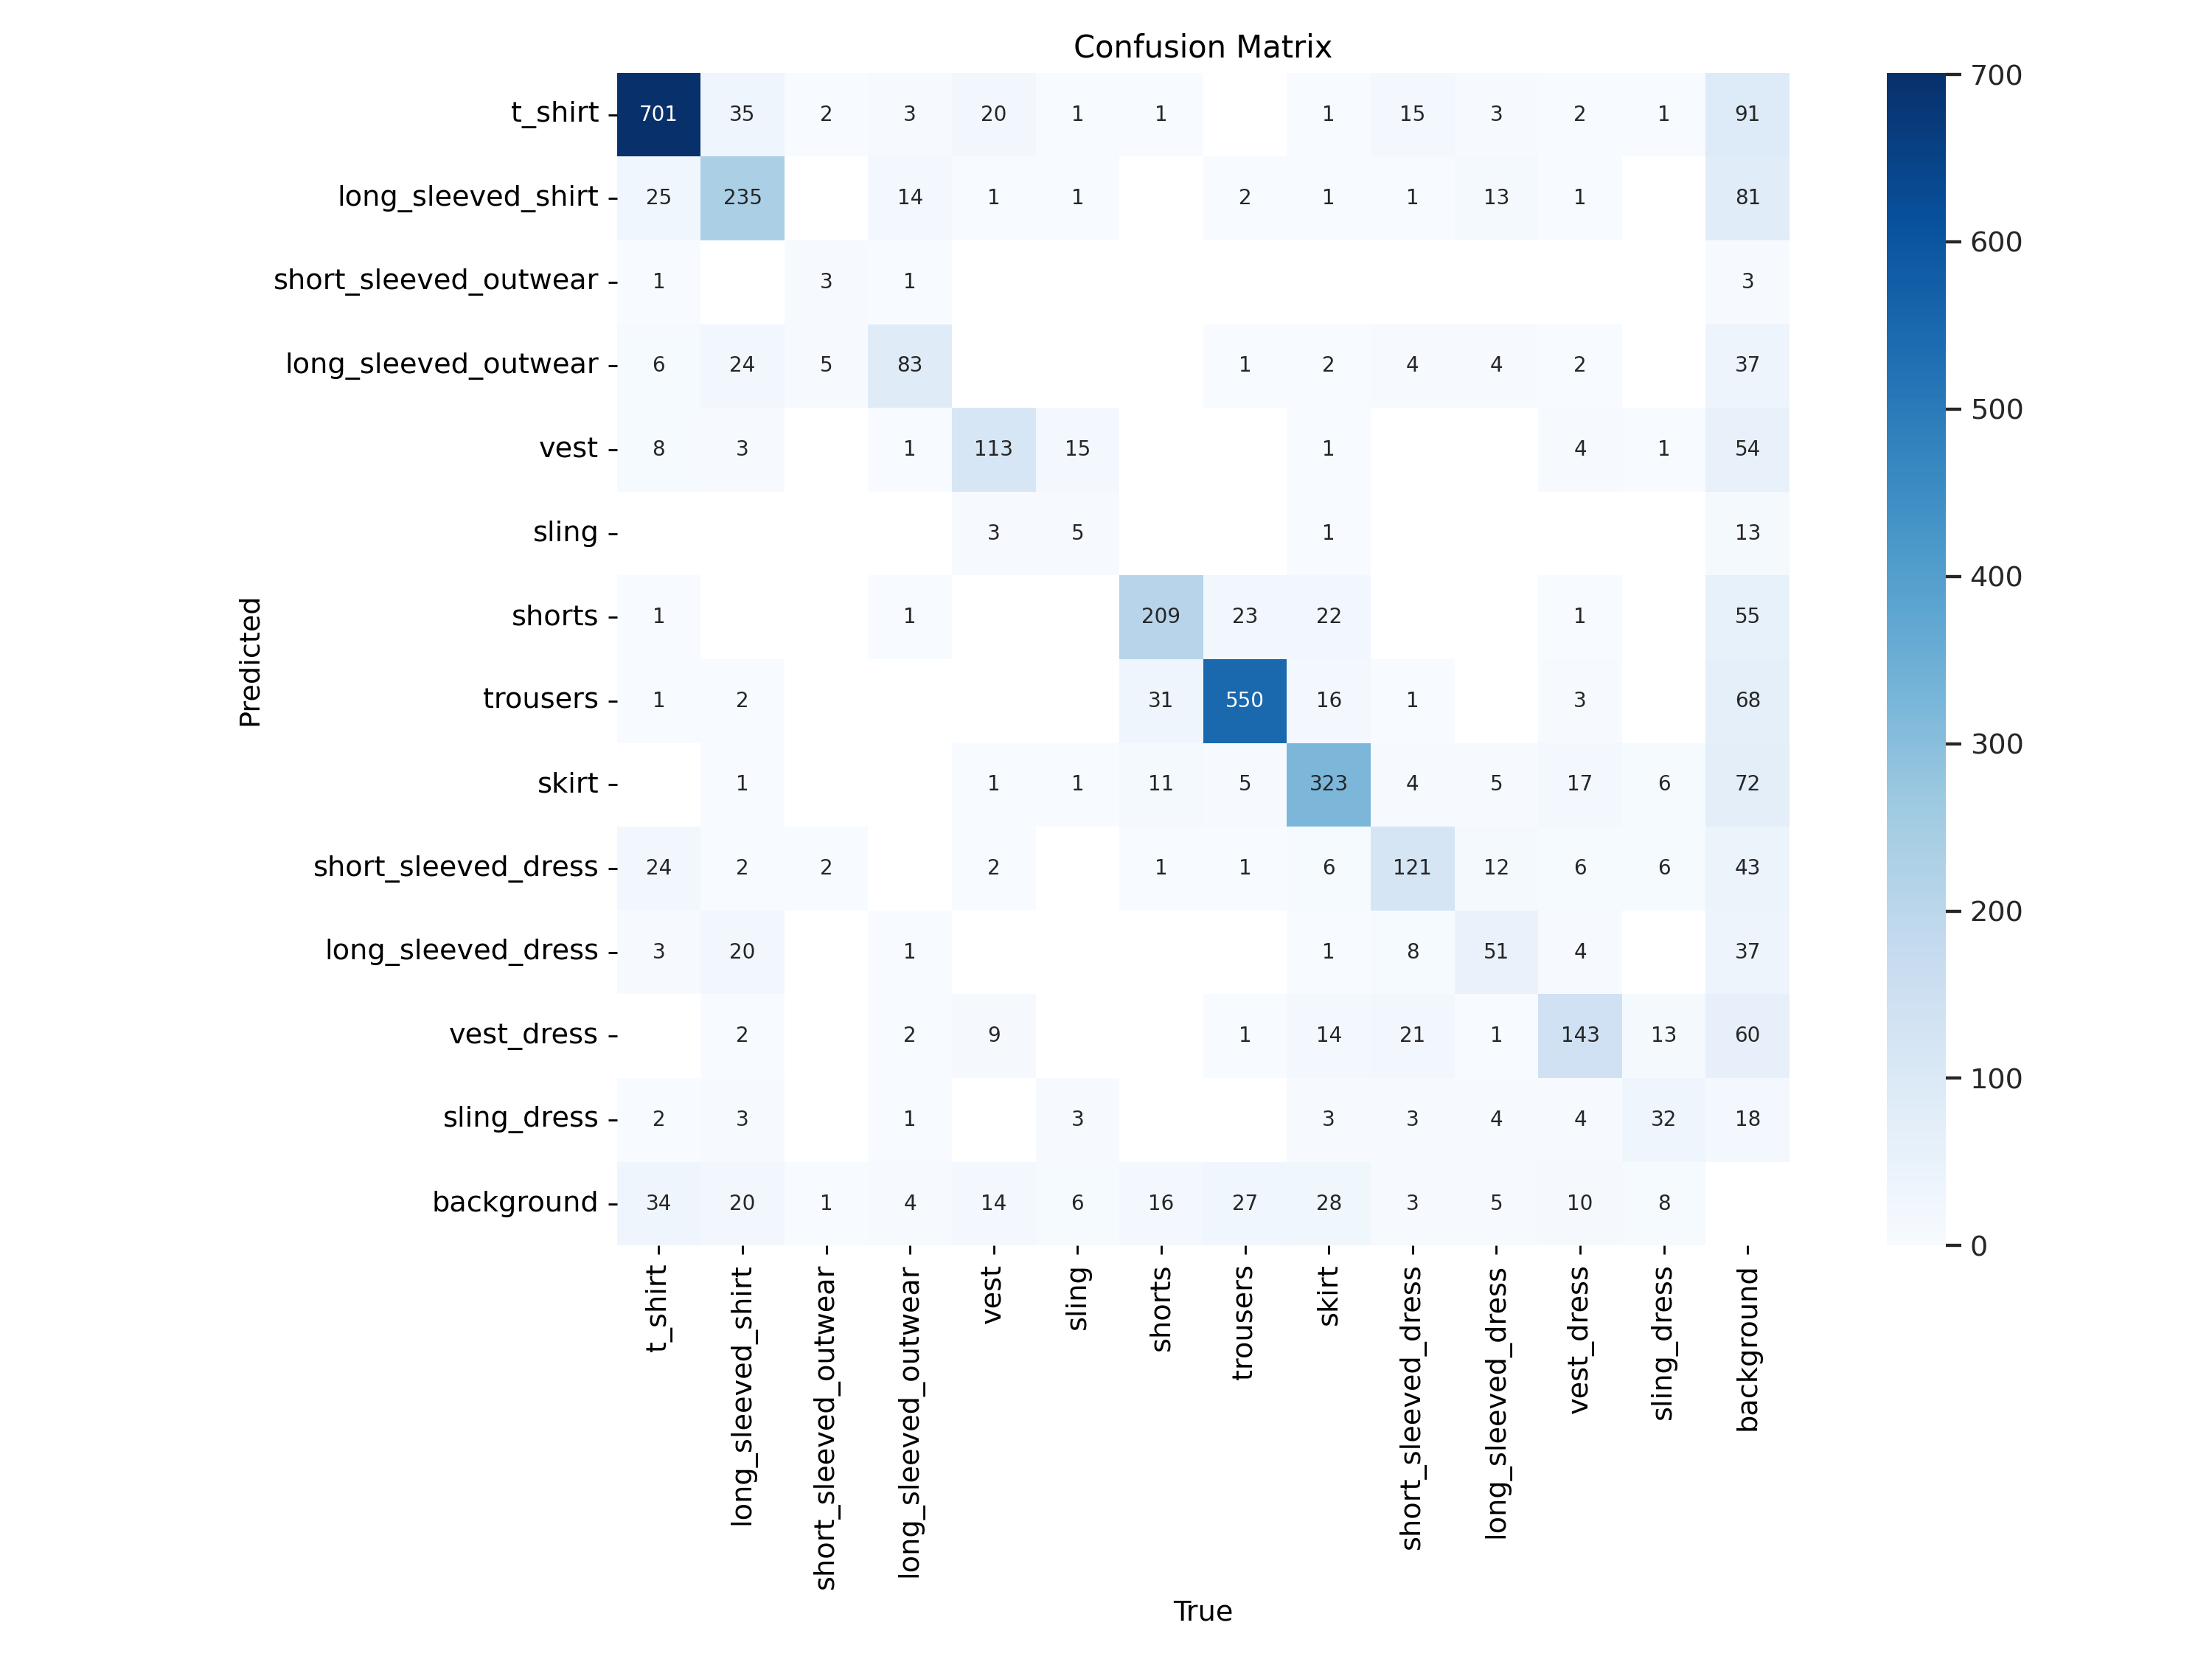

In [21]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='./runs/detect/train2/F1_curve.png') 
y = Image(filename='./runs/detect/train2/PR_curve.png') 
z = Image(filename='./runs/detect/train2/confusion_matrix.png') 
display(x, y,z)

In [121]:
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model
class_names = ["t_shirt","long_sleeved_shirt","short_sleeved_outwear","long_sleeved_outwear","vest","sling","shorts","trousers","skirt","short_sleeved_dress","long_sleeved_dress","vest_dress","sling_dress"]
def predict(frame):
    results = model(frame)
    return results

import webcolors

def get_color_name(hex_color):
    try:
        # Get the closest color name
        color_name = webcolors.hex_to_name(hex_color)
    except ValueError:
        # If exact match not found, find the closest color
        closest_name = None
        min_distance = float('inf')
        for name, hex_value in webcolors._definitions._CSS3_NAMES_TO_HEX.items():
            r, g, b = webcolors.hex_to_rgb(hex_value)
            input_r, input_g, input_b = webcolors.hex_to_rgb(hex_color)
            distance = sum((c1 - c2) ** 2 for c1, c2 in zip((input_r, input_g, input_b), (r, g, b)))
            if distance < min_distance:
                min_distance = distance
                closest_name = name
        color_name = closest_name
    return color_name

def plot_bboxes(results, frame):
    xyxys = []
    confidences = []
    class_ids = []
    average_colors = []
    color_names = []

    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            xyxy = box.xyxy[0]  # Extract bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = box.cls[0]    # Class ID

            # Append bounding box data
            xyxys.append(xyxy)
            confidences.append(conf)
            class_ids.append(cls)

            # Extract the region of interest (ROI) for the bounding box
            x1, y1, x2, y2 = map(int, xyxy)
            roi = frame[y1:y2, x1:x2]

            # Calculate the average color of the ROI
            if roi.size > 0:  # Ensure the ROI is not empty
                avg_color = np.mean(roi, axis=(0, 1))  # Average over height and width
                avg_color_rgb = avg_color[::-1]  # Convert BGR to RGB
                avg_color_hex = '#%02x%02x%02x' % tuple(map(int, avg_color_rgb))  # Convert to HEX
                average_colors.append(avg_color_hex)

                # Get the color name
                color_name = get_color_name(avg_color_hex)
                color_names.append(color_name)

            # Draw the bounding box on the frame
            frame = cv2.rectangle(frame, (x1, y1), (x2, y2), tuple(map(int, avg_color)), 2)
            frame = cv2.putText(frame, f"Class: {class_names[int(cls)]}, Conf: {conf:.2f}, Color: {color_name}", 
                                (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, tuple(map(int, avg_color)), 2)

    for color, name in zip(average_colors, color_names):
        print(f"Average color (HEX): {color}, Name: {name}")
    return frame

cap = cv2.VideoCapture(0)
assert cap.isOpened(), "Cannot open camera"
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?).Exiting ...")
        break
    results = predict(frame)
    frame = plot_bboxes(results, frame)
    cv2.imshow("Res", frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 t_shirt, 5.2ms
Speed: 0.5ms preprocess, 5.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Average color (HEX): #4c5a7a, Name: darkslateblue

0: 480x640 1 t_shirt, 6.3ms
Speed: 0.8ms preprocess, 6.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Average color (HEX): #546384, Name: dimgray

0: 480x640 1 t_shirt, 6.3ms
Speed: 0.5ms preprocess, 6.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Average color (HEX): #8392b2, Name: lightslategray

0: 480x640 1 t_shirt, 5.5ms
Speed: 0.6ms preprocess, 5.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Average color (HEX): #7c8cac, Name: lightslategray

0: 480x640 1 t_shirt, 5.3ms
Speed: 0.6ms preprocess, 5.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Average color (HEX): #7281a1, Name: lightslategray

0: 480x640 1 t_shirt, 5.3ms
Speed: 0.7ms preprocess, 5.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Ave

In [91]:
%pip install --upgrade webcolors


Note: you may need to restart the kernel to use updated packages.
